In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
#import uproot
import uproot3
from scipy import optimize as op
import matplotlib as mpl

*Bin Conversions*
Available Functions:
Note: All functions return new arrays rather than altering the previous array
	New_Merged_Size(array_,merge_size_) returns what the size of the new merged array will be
	Merge_Bin_Edges(edges_,merge_size) merges the bin edges 
	Merge_Bins(array_,merge_size_) adds together every <merge_size_> values in an array
	Merge_Vals(yarray_,merge_size_) adds together every <merge_size_> ybin together in an array
	Merge_Bins(xarray_,merge_size_) averages every <merge_size_> xbins together in an array
	Count_Non_Zero(array_) counts the number of nonzero values in an array
	Count_Zero(array_) counts the number of zeros in an array
	Remove_Zeros(array_) remove zeros from an array
	Remove_Zeros_Y(yarray_) removes zero values from yarray
	Remove_Zeros_X(xarray_,yarray_) removes xbins where the corresponding y value was zero
	Count_InBounds(yarray_,low_,high_) counts the number of values that fall between bounds (or equal to)
	Count_OutBounds(yarray_,low_,high_) co

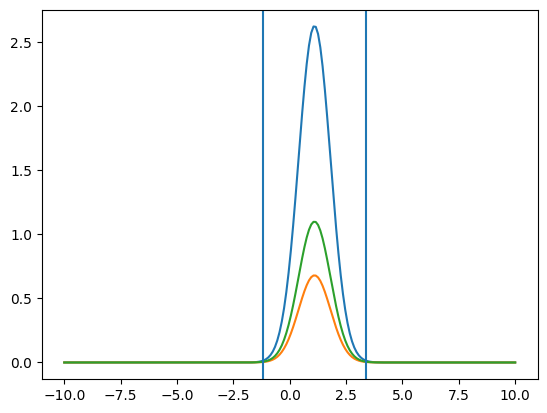

*Extracting Pieces for TH1*
Available Functions:
	Num_Xbins(TH1_) returns number of X bins for a TH1
	XEdges_1d(TH1_) returns edges of x bins for a TH1
	Center_Xbins(TH1_) returns center values for x bins for a TH1
	Values_1d(TH1_) returns the y values for a TH1
	Errors_1d(TH1_) returns the error values for TH1
	Errors2_1d(TH1_) returns the squared error values for TH1
Enjoy using TH1s

0.014000000000000012
You have access to information regarding all bin numbers, bin maxes, bin mins
Each goes _VAR_max_ min, bins, res, etc. 
All the names of them as well as edges.
Q2_Bin_Name[ 5 ]
W_Bin_Name[ 29 ]
MM1_Bin_Name[ 14 ]
MM2_Bin_Name[ 14 ]
theta_Bin_Name[ 10 ]
alpha_Bin_Name[ 10 ]
phi_Bin_Name[ 10 ]
_var_set_name_ [i]
_Xij_name_[i][j]
Also _mm1_name_ etc. for all Xijs
def Q2_Corr(Q2bin_) corrects the cross section for simulation so far as Q2 is concerned
def Xij_Bin_Name(var_, Xij_, Xijbin_,Wbin_=0):
def Xij_Plot_Name(var_, Xij_, Xijbin_,Wbin_=0):
def Xij_Var_Name(var_, Xij_):
$M(p',\pi^{+}

In [2]:
#Gain access to functions used to change some of the aspects regarding arrays and the things in them
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Bin\ Conversions.ipynb

#Gain Access to functions used to work with momentum binning
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Momentum\ Bins.ipynb

#Gain Access to functions used to work with Fitting Functions
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/Fitting\ Functions.ipynb

#Gain Access to functions used for TH2s 
#uproot3
#%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH2\ Functions-uproot3.ipynb
#uproot3
%run /Users/cmc/analysis_phd/analysis_twopi_clas6/cut_determinations/e16/TH1\ Functions-uproot3.ipynb

#Gain Access to the proper binning for the the various variables
%run /Users/cmc/analysis_phd/fitting/single_diff/Friend\ Binning\ Values.ipynb

In [3]:

exp_date = '10-11-2024'

emp_date = '10-08-2024'

exp_dir = "/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/"+exp_date
emp_dir = "/Users/cmc/analysis_phd/root_files/cut_determination/cut_det_e16/"+emp_date

rootfile_exp = exp_dir+"/"+"empty_exp_e16_clas6_golden_hel_"+exp_date+".root"
#rootfile_emp = emp_dir+"/"+"empty_exp_e16_clas6_golden_"+emp_date+".root"
rootfile_emp = emp_dir+"/"+"empty_exp_e16_clas6_golden_hel_"+emp_date+".root"
mu="\u03BC"


In [4]:
xfile = uproot3.open(rootfile_exp)
efile = uproot3.open(rootfile_emp)

In [5]:
xhist = [[[xfile['Golden Run Determination']['Integrated Faraday Cup Charge by Run E1-6'],
           xfile['Golden Run Determination']['2 Integrated Faraday Cup Charge by Run E1-6'],
           xfile['Golden Run Determination']['3 Integrated Faraday Cup Charge by Run E1-6'],
           xfile['Golden Run Determination']['4 Integrated Faraday Cup Charge by Run E1-6'],
           xfile['Golden Run Determination']['5 Integrated Faraday Cup Charge by Run E1-6'],
           xfile['Golden Run Determination']['6 Integrated Faraday Cup Charge by Run E1-6']],
          [xfile['Golden Run Determination']['Integrated Faraday Cup Charge by Run E1-6 Pos'],
           xfile['Golden Run Determination']['2 Integrated Faraday Cup Charge by Run E1-6 Pos'],
           xfile['Golden Run Determination']['3 Integrated Faraday Cup Charge by Run E1-6 Pos'],
           xfile['Golden Run Determination']['4 Integrated Faraday Cup Charge by Run E1-6 Pos'],
           xfile['Golden Run Determination']['5 Integrated Faraday Cup Charge by Run E1-6 Pos'],
           xfile['Golden Run Determination']['6 Integrated Faraday Cup Charge by Run E1-6 Pos']],
          [xfile['Golden Run Determination']['Integrated Faraday Cup Charge by Run E1-6 Neg'],
           xfile['Golden Run Determination']['2 Integrated Faraday Cup Charge by Run E1-6 Neg'],
           xfile['Golden Run Determination']['3 Integrated Faraday Cup Charge by Run E1-6 Neg'],
           xfile['Golden Run Determination']['4 Integrated Faraday Cup Charge by Run E1-6 Neg'],
           xfile['Golden Run Determination']['5 Integrated Faraday Cup Charge by Run E1-6 Neg'],
           xfile['Golden Run Determination']['6 Integrated Faraday Cup Charge by Run E1-6 Neg']],
          [xfile['Golden Run Determination']['Integrated Faraday Cup Charge by Run E1-6 None'],
           xfile['Golden Run Determination']['2 Integrated Faraday Cup Charge by Run E1-6 None'],
           xfile['Golden Run Determination']['3 Integrated Faraday Cup Charge by Run E1-6 None'],
           xfile['Golden Run Determination']['4 Integrated Faraday Cup Charge by Run E1-6 None'],
           xfile['Golden Run Determination']['5 Integrated Faraday Cup Charge by Run E1-6 None'],
           xfile['Golden Run Determination']['6 Integrated Faraday Cup Charge by Run E1-6 None']]],
         [[xfile['Golden Run Determination']['Integrated Faraday Cup Events by Run E1-6'],
           xfile['Golden Run Determination']['2 Integrated Faraday Cup Events by Run E1-6'],
           xfile['Golden Run Determination']['3 Integrated Faraday Cup Events by Run E1-6'],
           xfile['Golden Run Determination']['4 Integrated Faraday Cup Events by Run E1-6'],
           xfile['Golden Run Determination']['5 Integrated Faraday Cup Events by Run E1-6'],
           xfile['Golden Run Determination']['6 Integrated Faraday Cup Events by Run E1-6']],
          [xfile['Golden Run Determination']['Integrated Faraday Cup Events by Run E1-6 Pos'],
           xfile['Golden Run Determination']['2 Integrated Faraday Cup Events by Run E1-6 Pos'],
           xfile['Golden Run Determination']['3 Integrated Faraday Cup Events by Run E1-6 Pos'],
           xfile['Golden Run Determination']['4 Integrated Faraday Cup Events by Run E1-6 Pos'],
           xfile['Golden Run Determination']['5 Integrated Faraday Cup Events by Run E1-6 Pos'],
           xfile['Golden Run Determination']['6 Integrated Faraday Cup Events by Run E1-6 Pos']],
          [xfile['Golden Run Determination']['Integrated Faraday Cup Events by Run E1-6 Neg'],
           xfile['Golden Run Determination']['2 Integrated Faraday Cup Events by Run E1-6 Neg'],
           xfile['Golden Run Determination']['3 Integrated Faraday Cup Events by Run E1-6 Neg'],
           xfile['Golden Run Determination']['4 Integrated Faraday Cup Events by Run E1-6 Neg'],
           xfile['Golden Run Determination']['5 Integrated Faraday Cup Events by Run E1-6 Neg'],
           xfile['Golden Run Determination']['6 Integrated Faraday Cup Events by Run E1-6 Neg']],
          [xfile['Golden Run Determination']['Integrated Faraday Cup Events by Run E1-6 None'],
           xfile['Golden Run Determination']['2 Integrated Faraday Cup Events by Run E1-6 None'],
           xfile['Golden Run Determination']['3 Integrated Faraday Cup Events by Run E1-6 None'],
           xfile['Golden Run Determination']['4 Integrated Faraday Cup Events by Run E1-6 None'],
           xfile['Golden Run Determination']['5 Integrated Faraday Cup Events by Run E1-6 None'],
           xfile['Golden Run Determination']['6 Integrated Faraday Cup Events by Run E1-6 None']]]]
ehist = [efile['Golden Run Determination']['Normalized Integrated Faraday Cup Charge by Run E1-6'],
         efile['Golden Run Determination']['Normalized Integrated Faraday Cup Charge Distribution E1-6'],
        efile['Golden Run Determination']['Integrated Faraday Cup Charge by Run E1-6'],
        efile['Golden Run Determination']['Integrated Faraday Cup Events by Run E1-6'],
        efile['Golden Run Determination']['Integrated Faraday Cup Charge by Run E1-6 Pos'],
        efile['Golden Run Determination']['Integrated Faraday Cup Events by Run E1-6 Pos'],
        efile['Golden Run Determination']['Integrated Faraday Cup Charge by Run E1-6 Neg'],
        efile['Golden Run Determination']['Integrated Faraday Cup Events by Run E1-6 Neg']]

In [6]:
#xvals = [[Center_Xbins(xhist[i]) for i in range(38)],[Center_Xbins(ehist[i]) for i in range(8)]]
#yvals = [[Values_1d(xhist[i]) for i in range(38)],[Values_1d(ehist[i]) for i in range(8)]]         
   
    
xvals = [[[Center_Xbins(xhist[i][j][k]) for k in range(6)] for j in range(4)] for i in range(2)]
yvals = [[[Values_1d(xhist[i][j][k]) for k in range(6)] for j in range(4)] for i in range(2)]

In [7]:
empty_runs = [30745,30746, 30824, 30825, 30867, 30961, 30962, 31029, 31104, 31252, 31253, 31254, 31298, 31299, 31300, 31344, 31382, 31393]
filled_runs = [30540,30541,30542,30543,30563,30585,30549,30550,30551,30565,30568,30570,30571,30572,30579,30580,30582,30583,30584,30586,30587,30588,30589,30590,30591,30592,30593,30594,30595,30599,30600,30601,30602,30603,30604,30605,30606,30610,30612,30613,30614,30615,30616,30617,30618,30619,30620,30621,30622,30623,30624,30625,30626,30627,30628,30629,30631,30632,30633,30636,30638,30640,30678,30680,30681,30682,30684,30686,30687,30693,30694,30695,30698,30698,30699,30700,30701,30702,30703,30704,30705,30707,30708,30710,30711,30712,30713,30718,30719,30720,30722,30723,30724,30725,30726,30727,30728,30729,30730,30731,30732,30734,30735,30736,30737,30739,30740,30741,30742,30743,30745,30746,30747,30748,30749,30750,30753,30755,30756,30757,30758,30759,30760,30761,30762,30763,30766,30767,30768,30769,30773,30774,30775,30776,30777,30778,30779,30780,30781,30783,30784,30785,30786,30787,30789,30790,30791,30792,30794,30795,30799,30800,30801,30802,30803,30804,30805,30806,30807,30808,30809,30810,30811,30812,30813,30814,30815,30816,30817,30818,30819,30820,30821,30824,30825,30826,30827,30828,30829,30830,30831,30832,30833,30834,30835,30836,30837,30838,30839,30840,30841,30842,30843,30847,30848,30849,30850,30851,30852,30853,30854,30855,30856,30857,30858,30859,30860,30861,30862,30863,30864,30865,30866,30867,30909,30910,30912,30913,30914,30915,30916,30917,30918,30919,30920,30921,30922,30923,30924,30925,30926,30927,30928,30929,30930,30931,30932,30933,30934,30935,30940,30941,30942,30943,30944,30945,30946,30947,30948,30949,30950,30951,30952,30953,30954,30955,30956,30957,30958,30960,30961,30962,30963,30964,30965,30966,30967,30968,30969,30970,30971,30972,30973,30974,30975,30976,30977,30978,30985,30990,30991,30992,30993,30994,30995,30996,30997,30998,30999,31000,31001,31002,31003,31004,31005,31006,31007,31008,31009,31011,31012,31013,31014,31015,31016,31017,31018,31019,31029,31030,31031,31032,31033,31034,31035,31036,31037,31038,31039,31040,31041,31042,31043,31044,31045,31046,31047,31048,31049,31050,31051,31052,31053,31056,31057,31058,31059,31060,31061,31062,31063,31064,31065,31066,31068,31069,31070,31071,31072,31073,31074,31075,31076,31079,31080,31081,31082,31083,31084,31085,31086,31087,31088,31089,31090,31091,31092,31093,31094,31096,31097,31098,31099,31100,31101,31102,31103,31104,31108,31109,31110,31111,31112,31113,31114,31115,31116,31117,31118,31119,31120,31121,31122,31123,31124,31125,31141,31142,31143,31144,31145,31146,31147,31158,31159,31160,31162,31163,31164,31165,31166,31167,31168,31169,31170,31171,31172,31173,31174,31175,31176,31177,31178,31179,31180,31181,31182,31183,31184,31185,31186,31188,31189,31190,31191,31192,31193,31194,31195,31196,31197,31199,31200,31201,31203,31206,31207,31208,31209,31210,31211,31212,31213,31215,31216,31217,31218,31219,31220,31221,31222,31223,31224,31225,31226,31227,31228,31229,31231,31232,31233,31234,31235,31236,31237,31238,31239,31240,31241,31242,31243,31244,31245,31246,31247,31248,31249,31250,31252,31253,31254,31255,31256,31257,31258,31259,31260,31261,31262,31263,31264,31265,31266,31267,31268,31269,31270,31275,31276,31277,31278,31279,31280,31281,31282,31283,31284,31285,31286,31287,31288,31289,31290,31291,31292,31293,31294,31295,31296,31298,31299,31300,31301,31302,31303,31304,31305,31306,31307,31308,31309,31310,31311,31312,31313,31314,31315,31316,31317,31320,31321,31322,31323,31324,31325,31326,31327,31328,31329,31330,31331,31332,31333,31334,31335,31336,31337,31338,31339,31340,31341,31342,31343,31344,31345,31346,31347,31348,31349,31350,31351,31352,31353,31354,31355,31356,31357,31358,31359,31360,31361,31362,31363,31364,31365,31366,31367,31368,31369,31370,31371,31372,31373,31374,31375,31376,31377,31378,31379,31381,31382,31392,31393,31394,31395,31396,31397,31399,31400,31401,31402,31403,31404,31405,31406,31407,31408,31409,31410,31411,31412,31413,31414,31415,31416,31417,31418,31419,31422,31423,31424,31425,31426,31431,31432,31433,31434,31435,31436,31437,31438,31439,31440,31441,31442,31443,31444,31445,31446,31447,31448,31449,31450,31451,31452,31453,31454,31455,31456,31457,31458,31459,31460,31461,31462,31463,31464,31465,31466,31467,31468,31469,31470,31471,31472,31473,31474,31475,31476,31477,31478,31479,31480,31481,31482,31483,31484]

def is_empty(run_):
    for i in range(len(empty_runs)):
        if run_ == empty_runs[i]:
            return True
    return False

def is_filled(run_):
    for i in range(len(filled_runs)):
        if run_ == filled_runs[i]:
            if is_empty(run_) == False:
                return True
    return False


cuts = np.zeros((2,3))

In [46]:
#hel_idx [non,pos,neg]
#kidx = 
def ratio_find(hel_idx_,kidx1_,kidx2_,filled_):
    span = len(xvals[0][hel_idx_][kidx1_])
    output = np.zeros(span)
    for i in range(span):
        if yvals[1][hel_idx_][kidx2_][i]>0.0:
            if filled_:
                if is_filled(xvals[0][hel_idx_][kidx1_][i]):
                    output[i]= yvals[0][hel_idx_][kidx1_][i]/yvals[1][hel_idx_][kidx2_][i]
            else:
                if is_empty(xvals[0][hel_idx_][kidx1_][i]):
                    output[i]= yvals[0][hel_idx_][kidx1_][i]/yvals[1][hel_idx_][kidx2_][i]
        else:
            output[i]=0
    return output

In [9]:
hidx_cons = ["filenames deltaq>0 qprev>0","filenames deltaq>0","filenames","runnum deltaq>0 qprev>0","runnum deltaq>0","runnum"]
hidx_ps = ["unpolarized","pos","neg"]
hidx_ks = ["charge","events"]



In [33]:
#[filled/empty][hel_idx][kidx]
qtot = np.zeros((2,4,6))
etot = np.zeros((2,4,6))
#[hel_idx][kidx][kidx]
ratio = np.zeros((4,6,6))

for hel_idx in range(4):
    for kidx in range(6):
        for i in range(len(xvals[0][hel_idx][kidx])):
            if is_filled(xvals[0][hel_idx][kidx][i]):
                qtot[0][hel_idx][kidx]+= yvals[0][hel_idx][kidx][i]
                etot[0][hel_idx][kidx]+= yvals[1][hel_idx][kidx][i]
            if is_empty(xvals[0][hel_idx][kidx][i]):
                qtot[1][hel_idx][kidx]+= yvals[0][hel_idx][kidx][i]
                etot[1][hel_idx][kidx]+= yvals[1][hel_idx][kidx][i]
                
for hel_idx in range(4):
    for kidx1 in range(6):
        for kidx2 in range(6):
            ratio[hel_idx][kidx1][kidx2] = qtot[0][hel_idx][kidx1]/qtot[1][hel_idx][kidx2]
            
print("filled\n",qtot[0])

print("empty\n",qtot[1])

print("filled ratio\n",ratio[1])

print("empty ratio\n",ratio[1])



filled
 [[ 21105.10598588 207132.81653256 207121.56236119  21105.10598588
  207132.81653256  21453.59706575]
 [  5350.6689401   52227.64451902  52227.64451902   5350.6689401
   52227.64451902   5958.92997454]
 [  5306.11595193  50675.52562756  50664.27145619   5306.11595193
   50675.52562756   3606.92126555]
 [ 10448.32109385 104229.64638598 104229.64638598  10448.32109385
  104229.64638598  11887.74582566]]
empty
 [[1700.47410834 5255.74725722 1663.93056105 1700.47410834 6533.35058974
   -83.05431367]
 [ 432.18494692 1278.11922067  921.51680368  432.18494692 1646.29390329
   771.20476145]
 [ 423.7179181  1172.8009755  -566.38624984  423.7179181  1740.0421254
  -628.44772369]
 [ 844.57124332 2804.82706104 1308.80000721  844.57124332 3147.01456104
  -225.81135143]]
filled ratio
 [[ 12.38050742   4.18636138   5.80637154  12.38050742   3.25012984
    6.93806523]
 [120.84558912  40.86288953  56.67573756 120.84558912  31.72437462
   67.72214998]
 [120.84558912  40.86288953  56.67573756 120.

In [38]:
print(qtot[0][0][0])

21105.10598588491


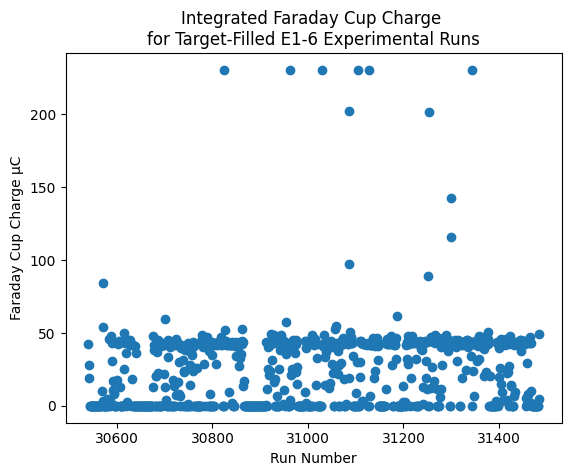

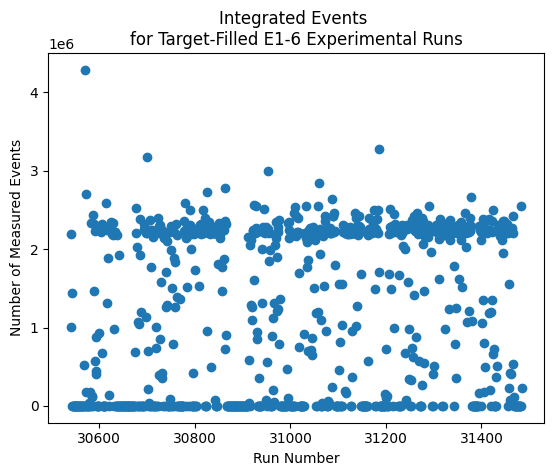

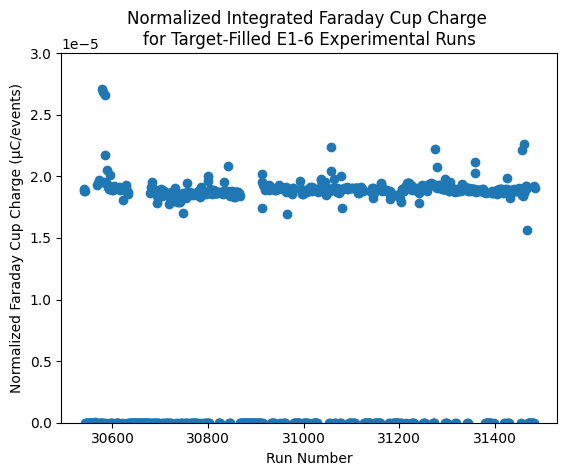

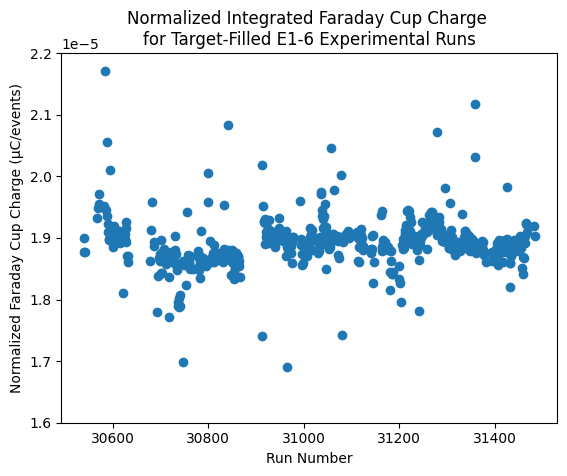

2.6000000000000002e-05


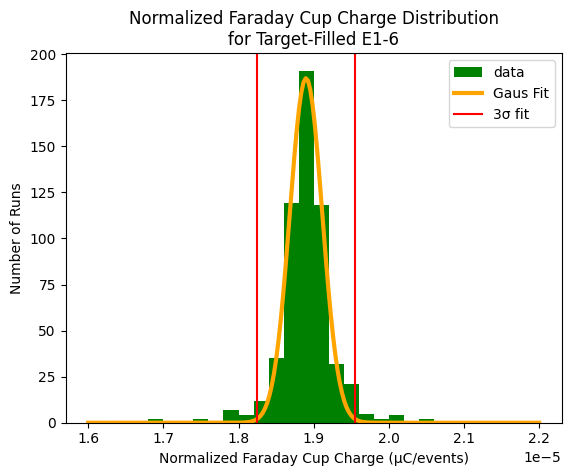

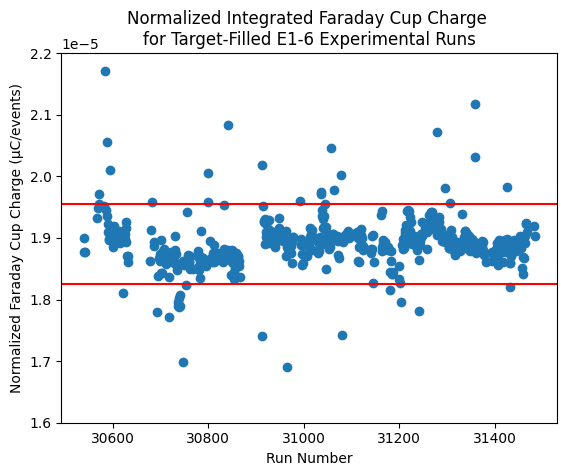

[1.86954043e+02 1.88987075e-05 2.16317809e-07]
21105.10598588491
19761.136726794168
1343.9692590907453
0.9363201843198707 0.06367981568012933
1086488973.0
1031239670.0
55249303.0
0.9491487678448808 0.050851232155119164


In [76]:
#Target Filled
hel_idx = 0
kidx = 0
filled = True




plt.scatter(xvals[0][hel_idx][kidx],yvals[0][hel_idx][kidx])
plt.title("Integrated Faraday Cup Charge \nfor Target-Filled E1-6 Experimental Runs")
plt.xlabel("Run Number")
plt.ylabel("Faraday Cup Charge {}C".format(mu))
plt.show()

plt.scatter(xvals[1][hel_idx][kidx],yvals[1][hel_idx][kidx])
plt.title("Integrated Events \nfor Target-Filled E1-6 Experimental Runs")
plt.xlabel("Run Number")
plt.ylabel("Number of Measured Events")
plt.show()


ratio_exp = ratio_find(hel_idx,kidx,kidx+2,filled)
    
plt.scatter(xvals[0][hel_idx][kidx],ratio_exp)
plt.title("Normalized Integrated Faraday Cup Charge \nfor Target-Filled E1-6 Experimental Runs")
plt.xlabel("Run Number")
plt.ylabel("Normalized Faraday Cup Charge ({}C/events)".format(mu))
plt.ylim(0.0,0.00003)
plt.show()




#low = 0.00010
#top = 0.00025
low = 0.000016
top = 0.000022
nbins = 30


plt.scatter(xvals[0][hel_idx][kidx],ratio_exp)
plt.title("Normalized Integrated Faraday Cup Charge \nfor Target-Filled E1-6 Experimental Runs")
plt.xlabel("Run Number")
plt.ylabel("Normalized Faraday Cup Charge ({}C/events)".format(mu))
plt.ylim(low,top)
plt.show()

res = (top-low)/nbins

print(low + res*50)

cont_x = np.linspace(low,top,200)
ini_par = [100,0.00002,0.00001]

fit_x = [low + (j+0.5)*res for j in range(nbins)]
fit_y = np.zeros(nbins)

for i in range(len(ratio_exp)):
    if ratio_exp[i] > 0.0:
        for j in range(nbins):
            if ratio_exp[i] >= low + j*res and ratio_exp[i] < low + (j+1)*res:
                fit_y[j] += 1
sigma="\u03C3"                

plt.hist(ratio_exp,range=[low,top],bins=nbins,color='green',label="data")
pars, pars_cov = op.curve_fit(Gaus,fit_x,fit_y,p0=ini_par,maxfev=5000)
plt.plot(cont_x,Gaus(cont_x,*pars),label='Gaus Fit',color='orange',linewidth=3)
plt.axvline(x=pars[1]+3*pars[2],color='r',label='3{} fit'.format(sigma))
plt.axvline(x=pars[1]-3*pars[2],color='r')
plt.title("Normalized Faraday Cup Charge Distribution\nfor Target-Filled E1-6")
plt.ylabel("Number of Runs")
plt.xlabel("Normalized Faraday Cup Charge ({}C/events)".format(mu))
plt.legend()
plt.show()


plt.scatter(xvals[0][hel_idx][kidx],ratio_exp)
plt.title("Normalized Integrated Faraday Cup Charge \nfor Target-Filled E1-6 Experimental Runs")
plt.axhline(y=pars[1]+3*np.abs(pars[2]),color='r',label='3{} fit'.format(sigma))
plt.axhline(y=pars[1]-3*np.abs(pars[2]),color='r')
plt.xlabel("Run Number")
plt.ylabel("Normalized Faraday Cup Charge ({}C/events)".format(mu))
plt.ylim(low,top)
plt.show()
good_filled_exp = []
bad_filled_exp = []
print(pars)

qbad = np.zeros(2)
ebad = np.zeros(2)

qgood = np.zeros(2)
egood = np.zeros(2)

for i in range(len(xvals[0][hel_idx][kidx])):
    if is_filled(xvals[0][hel_idx][kidx][i]):
        if ratio_exp[i] >= pars[1]-3*np.abs(pars[2]) and ratio_exp[i] < pars[1]+3*np.abs(pars[2]):
            good_filled_exp.append(xvals[0][hel_idx][kidx][i])
        else:
            bad_filled_exp.append(xvals[0][hel_idx][kidx][i])
        
#print(good_filled_exp)


for i in range(len(xvals[0][hel_idx][kidx])):
    if is_filled(xvals[0][hel_idx][kidx][i]):
        if ratio_exp[i] >= pars[1]-3*np.abs(pars[2]) and ratio_exp[i] < pars[1]+3*np.abs(pars[2]):
            qgood[0]+= yvals[0][hel_idx][kidx][i]
            egood[0]+= yvals[1][hel_idx][kidx][i]
        else:
            qbad[0] += yvals[0][hel_idx][kidx][i]
            ebad[0] += yvals[1][hel_idx][kidx][i]

print(qtot[0][hel_idx][kidx])
print(qgood[0])
print(qbad[0])
print(qgood[0]/qtot[0][hel_idx][kidx],qbad[0]/qtot[0][hel_idx][kidx])

print(etot[0][hel_idx][kidx])
print(egood[0])
print(ebad[0])
print(egood[0]/etot[0][hel_idx][kidx],ebad[0]/etot[0][hel_idx][kidx])
            
            

In [89]:
print("Good Exp Filled Runs")
num=0
print("{",end='')
for i in range(len(good_filled_exp)):
    if is_filled(good_filled_exp[i]):
        print(int(good_filled_exp[i]),end='')
        num+=1
        if i != len(good_filled_exp)-1:
            print(",",end=' ')
print("};")
print(num)
print(len(good_filled_exp))

Good Exp Filled Runs
{30540, 30541, 30542, 30568, 30570, 30583, 30587, 30588, 30590, 30591, 30592, 30593, 30600, 30601, 30602, 30603, 30604, 30605, 30606, 30613, 30614, 30615, 30616, 30617, 30618, 30619, 30622, 30623, 30624, 30625, 30626, 30627, 30628, 30629, 30631, 30632, 30633, 30678, 30681, 30686, 30687, 30694, 30698, 30699, 30700, 30701, 30702, 30703, 30705, 30707, 30708, 30711, 30712, 30713, 30719, 30723, 30724, 30725, 30726, 30727, 30728, 30729, 30730, 30731, 30732, 30734, 30735, 30747, 30749, 30750, 30756, 30757, 30758, 30759, 30760, 30762, 30763, 30768, 30777, 30778, 30779, 30780, 30781, 30783, 30784, 30785, 30786, 30787, 30789, 30790, 30791, 30792, 30795, 30804, 30805, 30806, 30807, 30808, 30809, 30810, 30811, 30812, 30813, 30814, 30815, 30816, 30817, 30818, 30819, 30820, 30821, 30826, 30827, 30828, 30829, 30830, 30831, 30832, 30833, 30834, 30835, 30836, 30837, 30838, 30839, 30840, 30841, 30843, 30847, 30848, 30849, 30850, 30851, 30852, 30853, 30854, 30855, 30856, 30857, 30858

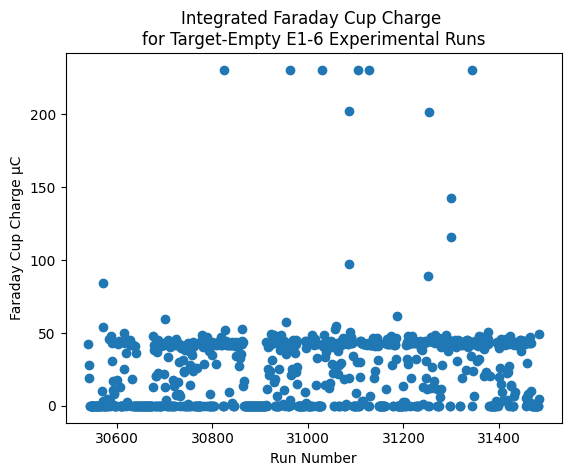

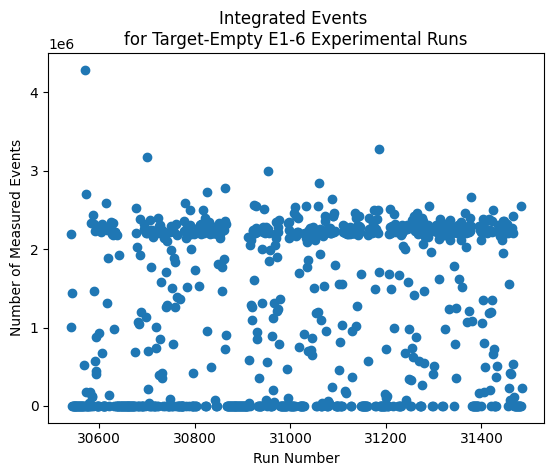

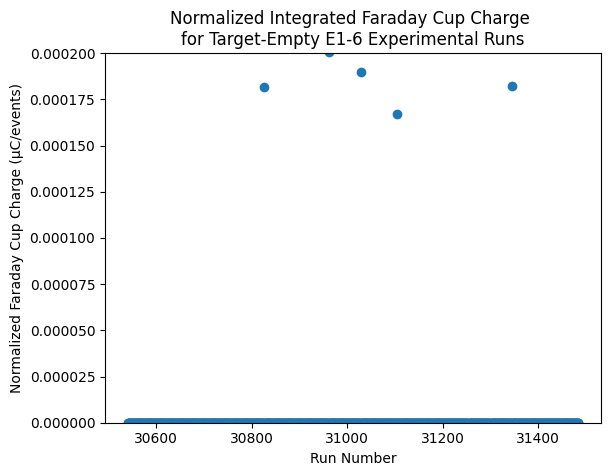

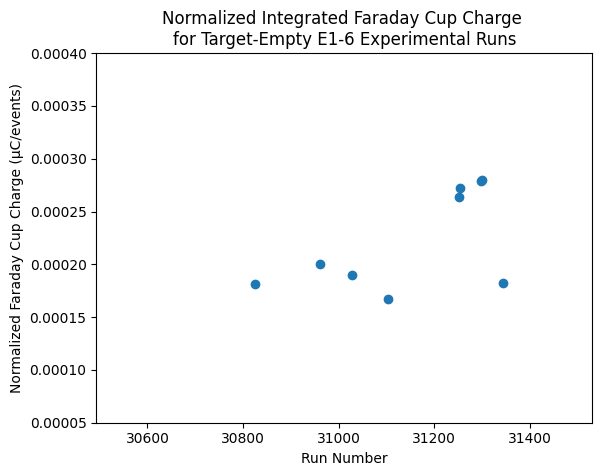

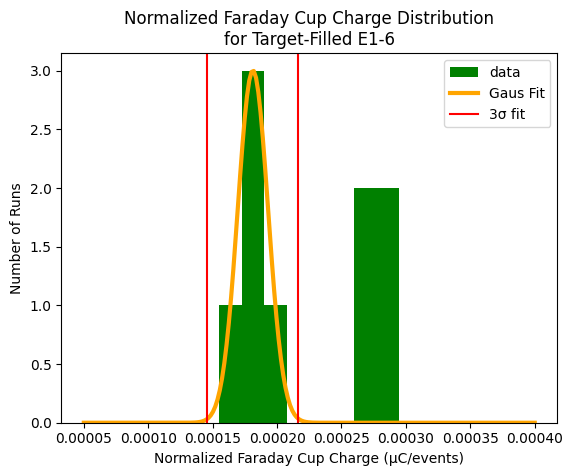

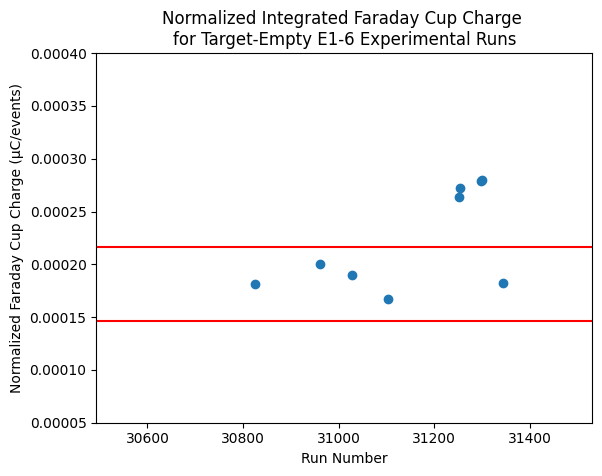

[1.86954043e+02 1.88987075e-05 2.16317809e-07]
1700.474108338356
1151.2904796004295
549.1836287379265
0.6770408758092944 0.3229591241907056
17.164336088015364
6352626.0
4356716.0
1995910.0
0.6858133943348782 0.3141866056651218
236.7011460007951


In [78]:
#Target Empty
hel_idx = 0
kidx = 0
filled = False




plt.scatter(xvals[0][hel_idx][kidx],yvals[0][hel_idx][kidx])
plt.title("Integrated Faraday Cup Charge \nfor Target-Empty E1-6 Experimental Runs")
plt.xlabel("Run Number")
plt.ylabel("Faraday Cup Charge {}C".format(mu))
plt.show()

plt.scatter(xvals[1][hel_idx][kidx],yvals[1][hel_idx][kidx])
plt.title("Integrated Events \nfor Target-Empty E1-6 Experimental Runs")
plt.xlabel("Run Number")
plt.ylabel("Number of Measured Events")
plt.show()


ratio_exp2 = ratio_find(hel_idx,kidx,kidx+2,filled)

#print(ratio_exp2)
    
plt.scatter(xvals[0][hel_idx][kidx],ratio_exp2)
plt.title("Normalized Integrated Faraday Cup Charge \nfor Target-Empty E1-6 Experimental Runs")
plt.xlabel("Run Number")
plt.ylabel("Normalized Faraday Cup Charge ({}C/events)".format(mu))
plt.ylim(0.0,0.0002)
plt.show()




#low = 0.00010
#top = 0.00025
low2 = 0.00005
top2 = 0.0004
nbins2 = 20


plt.scatter(xvals[1][hel_idx][kidx],ratio_exp2)
plt.title("Normalized Integrated Faraday Cup Charge \nfor Target-Empty E1-6 Experimental Runs")
plt.xlabel("Run Number")
plt.ylabel("Normalized Faraday Cup Charge ({}C/events)".format(mu))
plt.ylim(low2,top2)
plt.show()

res2 = (top2-low2)/nbins2


cont_x2 = np.linspace(low2,top2,200)
ini_par2 = [3,0.00017,0.00001]

fit_x2 = [low2 + (j+0.5)*res2 for j in range(nbins2)]
fit_y2 = np.zeros(nbins2)

for i in range(len(ratio_exp2)):
    if ratio_exp2[i] > 0.0:
        for j in range(nbins):
            if ratio_exp2[i] >= low2 + j*res2 and ratio_exp2[i] < low2 + (j+1)*res2:
                fit_y2[j] += 1
sigma="\u03C3"                

plt.hist(ratio_exp2,range=[low2,top2],bins=nbins2,color='green',label="data")
pars2, pars_cov2 = op.curve_fit(Gaus,fit_x2,fit_y2,p0=ini_par2,maxfev=5000)
#plt.plot(cont_x2,Gaus(cont_x2,*ini_par2),label='Gaus Guess',color='r',linewidth=3)
plt.plot(cont_x2,Gaus(cont_x2,*pars2),label='Gaus Fit',color='orange',linewidth=3)
plt.axvline(x=pars2[1]+3*pars2[2],color='r',label='3{} fit'.format(sigma))
plt.axvline(x=pars2[1]-3*pars2[2],color='r')
plt.title("Normalized Faraday Cup Charge Distribution\nfor Target-Filled E1-6")
plt.ylabel("Number of Runs")
plt.xlabel("Normalized Faraday Cup Charge ({}C/events)".format(mu))
plt.legend()
plt.show()


plt.scatter(xvals[0][hel_idx][kidx],ratio_exp2)
plt.title("Normalized Integrated Faraday Cup Charge \nfor Target-Empty E1-6 Experimental Runs")
plt.axhline(y=pars2[1]+3*np.abs(pars2[2]),color='r',label='3{} fit'.format(sigma))
plt.axhline(y=pars2[1]-3*np.abs(pars2[2]),color='r')
plt.xlabel("Run Number")
plt.ylabel("Normalized Faraday Cup Charge ({}C/events)".format(mu))
plt.ylim(low2,top2)
plt.show()
good_empty_exp = []
bad_empty_exp = []
print(pars)



for i in range(len(xvals[0][hel_idx][kidx])):
    if is_empty(xvals[0][hel_idx][kidx][i]):
        if ratio_exp2[i] >= pars2[1]-3*np.abs(pars2[2]) and ratio_exp2[i] < pars2[1]+3*np.abs(pars2[2]):
            good_empty_exp.append(xvals[0][hel_idx][kidx][i])
        else:
            bad_empty_exp.append(xvals[0][hel_idx][kidx][i])
        
#print(good_filled_exp)


for i in range(len(xvals[0][hel_idx][kidx])):
    if is_empty(xvals[0][hel_idx][kidx][i]):
        if ratio_exp2[i] >= pars2[1]-3*np.abs(pars2[2]) and ratio_exp2[i] < pars2[1]+3*np.abs(pars2[2]):
            qgood[1]+= yvals[0][hel_idx][kidx][i]
            egood[1]+= yvals[1][hel_idx][kidx][i]
        else:
            qbad[1] += yvals[0][hel_idx][kidx][i]
            ebad[1] += yvals[1][hel_idx][kidx][i]

print(qtot[1][hel_idx][kidx])
print(qgood[1])
print(qbad[1])
print(qgood[1]/qtot[1][hel_idx][kidx],qbad[1]/qtot[1][hel_idx][kidx])

print(qgood[0]/qgood[1])

print(etot[1][hel_idx][kidx])
print(egood[1])
print(ebad[1])
print(egood[1]/etot[1][hel_idx][kidx],ebad[1]/etot[1][hel_idx][kidx])
print(egood[0]/egood[1])
            

In [79]:
print("Good Exp Empty Runs")
num=0
print("{",end='')
for i in range(len(good_empty_exp)):
    if is_empty(good_empty_exp[i]):
        print(int(good_empty_exp[i]),end='')
        num+=1
        if i != len(good_empty_exp)-1:
            print(",",end='')
print("};")
print(num)
print(len(good_empty_exp))

Good Exp Empty Runs
{30825,30962,31029,31104,31344};
5
5


In [81]:
def good_empty(run_num_):
    for i in range(len(good_empty_exp)):
        if run_num_ == good_empty_exp[i]:
            return True
    return False

def good_filled(run_num_):
    for i in range(len(good_filled_exp)):
        if run_num_ == good_filled_exp[i]:
            return True
    return False

In [90]:
kidx = 0

qgood_hel = np.zeros((2,3))
egood_hel = np.zeros((2,3))

for hidx in range(3):
    for i in range(len(xvals[0][hidx+1][kidx])):
        if good_filled(xvals[0][hidx+1][kidx][i]):
            qgood_hel[0][hidx]+=yvals[0][hidx+1][kidx][i]
            egood_hel[0][hidx]+=yvals[1][hidx+1][kidx+2][i]
        if good_empty(xvals[0][hidx+1][kidx][i]):
            qgood_hel[1][hidx]+=yvals[0][hidx+1][kidx][i]
            egood_hel[1][hidx]+=yvals[1][hidx+1][kidx+2][i]
print(qgood_hel)
print(egood_hel)

print(qgood_hel[0][0]+qgood_hel[0][1]+qgood_hel[0][2],qgood[0])
for i in range(3):
    print(qgood_hel[0][i]/qgood[0])

    
    
print(egood_hel[0][2]/egood[0])
for i in range(3):
    print(qgood_hel[0][i]/qgood_hel[1][i])
    print(egood_hel[0][i]/egood_hel[1][i])
    

[[5016.21640749 4976.8271628  9768.0931565 ]
 [ 293.79123944  284.91327727  572.58596289]]
[[2.62311921e+08 2.62375440e+08 5.20579391e+08]
 [1.56968600e+06 1.57975300e+06 3.12217300e+06]]
19761.136726794168 19761.136726794168
0.2538425029309323
0.2518492347686842
0.4943082623003835
0.504809314599001
17.07408436359014
167.11107890367882
17.46786675060393
166.08636919822277
17.05960989188891
166.73624139341413


In [88]:
print(qgood_hel[0][0]/qgood_hel[0][1])
print(qgood_hel[1][0]/qgood_hel[1][1])

1.0079145293575296
1.0311602262174244


In [ ]:
#Target empty hel
fidx = 1
hidx = [[4,5],[6,7]]

xvals_emp2 = [[[],[]],[[],[]]]
yvals_emp2 = [[[],[]],[[],[]]]

ratio_emp2 = [[],[]]

print(hidx[0][0])
print(hidx[0][1])
print(hidx[1][0])
print(hidx[1][1])

bop = []
for j in range(len(xvals[fidx][hidx[i][0]])):
    if is_empty(xvals[fidx][hidx[1][0]][j]):
        print(xvals[fidx][hidx[1][0]][j],yvals[fidx][hidx[0][0]][j],yvals[fidx][hidx[1][0]][j])
#print(yvals[fidx][hidx[1][0]])

for i in range(2):
    for j in range(len(xvals[fidx][hidx[i][0]])):
        if is_empty(xvals[fidx][hidx[i][0]][j]):
            xvals_emp2[i][0].append(xvals[fidx][hidx[i][0]][j])
            xvals_emp2[i][1].append(xvals[fidx][hidx[i][1]][j])
            yvals_emp2[i][0].append(yvals[fidx][hidx[i][0]][j])
            yvals_emp2[i][1].append(yvals[fidx][hidx[i][1]][j])
        


for i in range(2):
    plt.scatter(xvals_emp2[i][0],yvals_emp2[i][0])
    plt.title("Integrated Faraday Cup Charge \nfor {} Target-Empty E1-6 Experimental Runs".format(hel_name[i]))
    plt.xlabel("Run Number")
    plt.ylabel("Faraday Cup Charge {}C".format(mu))
    plt.ylim(0.001,400)
    plt.show()

    plt.scatter(xvals_emp2[i][1],yvals_emp2[i][1])
    plt.title("Integrated Events \nfor {} Target-Empty E1-6 Experimental Runs".format(hel_name[i]))
    plt.xlabel("Run Number")
    plt.ylabel("Number of Measured Events")
    plt.show()


qtot_hel_emp=[0.0,0.0]

evt_tot_emp = [0,0]

for i in range(2):
    for j in range(len(xvals_emp2[i][0])):
        if good_empty(xvals_emp2[i][0][j]):
            qtot_hel_emp[i]+=yvals_emp2[i][0][j]
            evt_tot_emp[i]+=yvals_emp2[i][1][j]

            
print(qtot_hel_emp)
print(qtot_hel_emp[0]/qtot_hel_emp[1])

print(evt_tot_emp)
print(evt_tot_emp[0]/evt_tot_emp[1])
for i in range(2):
    print(qtot_hel_emp[i])
    print(qtot_hel[i]/qtot_hel_emp[i])
    
    print(evt_tot_emp[i])
    print(evt_tot[i]/evt_tot_emp[i])
    

In [ ]:
#Target Filled
fidx = 0
hidx = 0

b = 35
a = 4.0

tmp_x = [a*(i/b) for i in range(b)]
tmp_e = [a*(i/b) - (a*(2/b) - a*(1/b))/2.0 for i in range(b+1)]
tmp_y = np.zeros(b)

for i in range(len(yvals[fidx][hidx])):
    for j in range(b):
        if yvals[fidx][hidx][i] >= tmp_e[j] and yvals[fidx][hidx][i] < tmp_e[j+1] and yvals[fidx][hidx][i]>0.0 and is_filled(int(xvals[fidx][hidx][i])):
            tmp_y[j] += 1
    

plt.scatter(tmp_x,tmp_y,label='Data')

ini_par = [160,2.0,0.1]

cont_x = np.linspace(0.0,a,200)

pars00, pars_cov00 = op.curve_fit(Gaus,tmp_x,tmp_y,p0=ini_par,maxfev=0)
plt.plot(cont_x,Gaus(cont_x,*pars00),label='Gaus Fit',color='orange')
plt.axvline(x = pars00[1] - 3* pars00[2], color='r',label='cut lines')
plt.axvline(x = pars00[1] + 3* pars00[2], color='r')
plt.title("Normalized Integrated Faraday Cup Charge Distribution \nfor Target-Filled E1-6 Experimental Runs")
plt.xlabel("Normalized Faraday Cup Charge (10000x mC/evt)")
plt.ylabel("Number of Runs")
plt.legend()
plt.show()


x00 = []
y00 = []

for i in range(len(yvals[fidx][hidx])):
    if is_filled(int(xvals[fidx][hidx][i])):# and yvals[fidx][hidx][i]>0.0:
        x00.append(xvals[fidx][hidx][i])
        y00.append(yvals[fidx][hidx][i])

#plt.scatter(Remove_Zeros_X(xvals[fidx][hidx],yvals[fidx][hidx]),Remove_Zeros_Y(yvals[fidx][hidx]),label='Data')
plt.scatter(x00,y00,label='Data')
plt.axhline(y=pars00[1] - 3* pars00[2], color='r',label="cut lines")
plt.axhline(y=pars00[1] + 3* pars00[2], color='r')
plt.title("Normalized Integrated Faraday Cup Charge by Run \nfor Target-Filled E1-6 Experimental Runs")
plt.ylabel("Normalized Faraday Cup Charge (10000x mC/evt)")
plt.xlabel("Number of Runs")
plt.legend()
plt.show()


gold_exp_runs = []
bad_exp_runs = []
for i in range(len(xvals[fidx][hidx])):
    if yvals[fidx][hidx][i] >= pars00[1] - 3* pars00[2] and yvals[fidx][hidx][i] < pars00[1] + 3* pars00[2]:
        gold_exp_runs.append(xvals[fidx][hidx][i])
    else:
        bad_exp_runs.append(xvals[fidx][hidx][i])


In [ ]:
#Target Empty
fidx = 1
hidx = 0

b = 7
a = 4.0

tmp_x = [a*(i/b) for i in range(b)]
tmp_e = [a*(i/b) - (a*(2/b) - a*(1/b))/2.0 for i in range(b+1)]
tmp_y = np.zeros(b)

for i in range(len(yvals[fidx][hidx])):
    for j in range(b):
        if yvals[fidx][hidx][i] >= tmp_e[j] and yvals[fidx][hidx][i] < tmp_e[j+1] and yvals[fidx][hidx][i]>0.0 and is_empty(int(xvals[fidx][hidx][i])):
            tmp_y[j] += 1
    

plt.scatter(tmp_x,tmp_y,label='Data')

ini_par = [3,2.0,0.1]

cont_x = np.linspace(0.0,a,200)

pars10, pars_cov10 = op.curve_fit(Gaus,tmp_x,tmp_y,p0=ini_par,maxfev=0)
plt.plot(cont_x,Gaus(cont_x,*pars10),label='Gaus Fit',color='orange')
plt.axvline(x = pars10[1] - 3* pars10[2], color='r',label='cut lines')
plt.axvline(x = pars10[1] + 3* pars10[2], color='r')
plt.title("Normalized Integrated Faraday Cup Charge Distribution \nfor Target-Empty E1-6 Experimental Runs")
plt.xlabel("Normalized Faraday Cup Charge (10000x mC/evt)")
plt.ylabel("Number of Runs")
plt.legend()
plt.show()

x10 = []
y10 = []

for i in range(len(yvals[fidx][hidx])):
    if is_empty(int(xvals[fidx][hidx][i])):# and yvals[fidx][hidx][i]>0.0:
        x10.append(xvals[fidx][hidx][i])
        y10.append(yvals[fidx][hidx][i])

plt.scatter(x10,y10,label='Data')
#plt.scatter(Remove_Zeros_X(xvals[fidx][hidx],yvals[fidx][hidx]),Remove_Zeros_Y(yvals[fidx][hidx]),label='Data')
plt.axhline(y=pars10[1] - 3* pars10[2], color='r',label="cut lines")
plt.axhline(y=pars10[1] + 3* pars10[2], color='r')
plt.title("Normalized Integrated Faraday Cup Charge by Run \nfor Target-Empty E1-6 Experimental Runs")
plt.ylabel("Normalized Faraday Cup Charge (10000x mC/evt)")
plt.xlabel("Number of Runs")
plt.legend()
plt.show()


gold_emp_runs = []
bad_emp_runs = []
for i in range(len(xvals[fidx][hidx])):
    if yvals[fidx][hidx][i] >= pars10[1] - 3* pars10[2] and yvals[fidx][hidx][i] < pars10[1] + 3* pars10[2]:
        gold_emp_runs.append(xvals[fidx][hidx][i])
    else:
        bad_emp_runs.append(xvals[fidx][hidx][i])

In [ ]:
print("Good Exp Filled Runs")
print("{",end='')
for i in range(len(gold_exp_runs)):
    if is_filled(gold_exp_runs[i]):
        print(int(gold_exp_runs[i]),end='')
        if i != len(gold_exp_runs)-1:
            print(",",end='')
print("};")

print("\nBad Exp Filled Runs")
print("{",end='')
for i in range(len(bad_exp_runs)):
    if is_filled(bad_exp_runs[i]):
        print(int(bad_exp_runs[i]),end='')
        if i != len(bad_exp_runs)-1:
            print(",",end='')
print("};")

print(len(gold_exp_runs))

In [ ]:
print("Good Exp Empty Runs")
print("{",end='')
for i in range(len(gold_emp_runs)):
    if is_empty(gold_emp_runs[i]):
        print(int(gold_emp_runs[i]),end='')
        if i != len(gold_emp_runs)-1:
            print(",",end='')
print("};")

print("\nBad Exp Empty Runs")
print("{",end='')
for i in range(len(bad_emp_runs)):
    if is_empty(bad_emp_runs[i]):
        print(int(bad_emp_runs[i]),end='')
        if i != len(bad_emp_runs)-1:
            print(",",end='')
print("};")